In [1]:
import sys
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.figsize'] = (5, 5)
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.major.top'] = False
mpl.rcParams['ytick.major.right'] = False
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8


In [2]:
import galario
from galario import au, pc, arcsec
from galario.double import sweep

### Plot the data

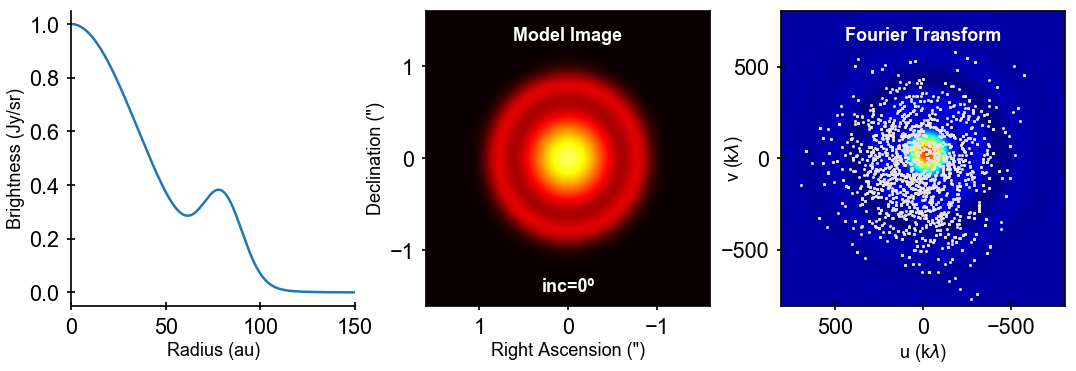

In [245]:
# Build the data

# panel 1: brightness radial profile
Rmin = 0.1 * au
dR = 0.2 * au
nrad = 1000
gridrad = np.linspace(Rmin, Rmin + dR * (nrad - 1), nrad)
ints = 1.*np.exp(-(gridrad/(50. * au))**2)
ints += 0.3*np.exp(-((gridrad-80.*au)/((15. * au)))**2)

# panel 2: model image
nxy = 2048
dist = 100 * pc
dxy = 0.2 * au
inc = 0.
image = sweep(ints, Rmin, dR, nxy, dxy, dist, inc)

# panel 2: fft
ft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(image)))


# Plot the data

width = 1600
min_lim, max_lim = nxy//2-width//2, nxy//2+width//2
width_arcsec = width/2.*dxy/au/(dist/pc)


width_uv = 32
duv = dist/nxy/dxy
width_duv =  width_uv/2.*duv/1.e3

nrows = 1
ncols = 3
height, width = 5, 15

# build the Figure

fig = plt.figure(figsize=(width, height))

# setup the subplots
gs = gridspec.GridSpec(nrows, ncols) #, width_ratios=[1.4, 1., 1.])
gs.update(left=0.07, right=0.99, top=0.98, bottom=0.16, wspace=0.25)
ax = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])]

ax[0].plot(gridrad/au, ints, '-', lw=2.5)
ax[0].set_xlim(0, 150)
ax[0].set_xlabel('Radius (au)')
ax[0].set_ylabel('Brightness (Jy/sr)')
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')

im = image[min_lim:max_lim, min_lim:max_lim]
ax[1].imshow(im, cmap='hot', interpolation='bicubic', origin='lower',
             extent=[width_arcsec, -width_arcsec, -width_arcsec, width_arcsec], aspect='auto', vmin=im.min(), vmax=im.max()*1.2)
ax[1].set_xlabel('Right Ascension (")')
ax[1].set_ylabel('Declination (")')
ax[1].text(0.5, 0.9, "Model Image", transform=ax[1].transAxes, ha='center', color='w', fontweight='bold')
ax[1].text(0.5, 0.05, "inc=0º", transform=ax[1].transAxes, ha='center', color='w', fontweight='bold')


ft_abs = (ft[nxy//2-width_uv//2:nxy//2+width_uv//2, nxy//2-width_uv//2:nxy//2+width_uv//2].real)
ax[2].imshow(ft_abs, cmap='jet', interpolation='bicubic', origin='lower', 
             extent=[width_duv, -width_duv, -width_duv, width_duv], aspect='auto')
ax[2].set_xlabel(r'u (k$\lambda$)')
ax[2].set_ylabel(r'v (k$\lambda$)', labelpad=-25)
ax[2].text(0.5, 0.9, "Fourier Transform", transform=ax[2].transAxes, ha='center', color='w', fontweight='bold')


# plot uvpoints
uvdata = np.loadtxt('alma_b7_G8_sc.txt')/0.88
u = uvdata[idx, 0]
v = uvdata[idx, 1]
ax[2].plot(u, v, '.', alpha=1, markeredgewidth=0., markerfacecolor='#e8e5df', color='#e8e5df')



plt.savefig('code_overview.pdf')

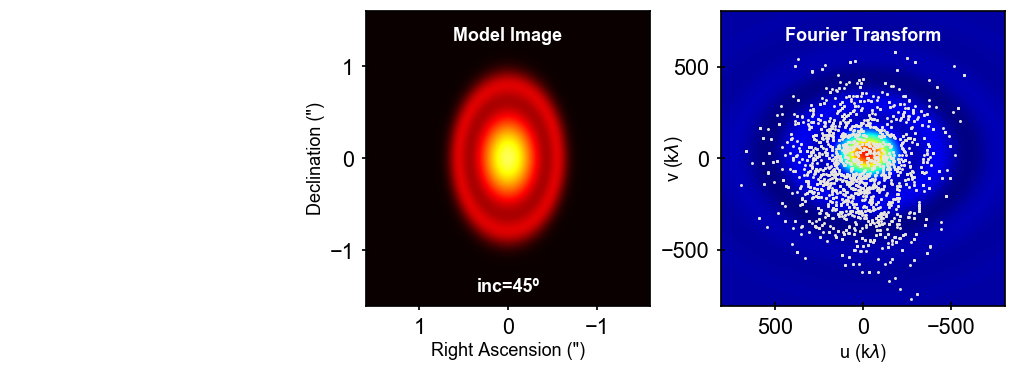

In [244]:
# Build the data

# panel 1: brightness radial profile
Rmin = 0.1 * au
dR = 0.2 * au
nrad = 1000
gridrad = np.linspace(Rmin, Rmin + dR * (nrad - 1), nrad)
ints = 1.*np.exp(-(gridrad/(50. * au))**2)
ints += 0.3*np.exp(-((gridrad-80.*au)/((15. * au)))**2)

# panel 2: model image
nxy = 2048
dist = 100 * pc
dxy = 0.2 * au
inc = 45.
image = sweep(ints, Rmin, dR, nxy, dxy, dist, inc)

# panel 2: fft
ft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(image)))


# Plot the data

width = 1600
min_lim, max_lim = nxy//2-width//2, nxy//2+width//2
width_arcsec = width/2.*dxy/au/(dist/pc)


width_uv = 32
duv = dist/nxy/dxy
width_duv =  width_uv/2.*duv/1.e3 # klambda

nrows = 1
ncols = 3
height, width = 5, 15


# build the Figure

fig = plt.figure(figsize=(width, height))

# setup the subplots
gs = gridspec.GridSpec(nrows, ncols) #, width_ratios=[1.4, 1., 1.])
gs.update(left=0.07, right=0.99, top=0.98, bottom=0.16, wspace=0.25)
ax = [plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])]

# empty first plot
ax[0].spines['top'].set_color('none')
ax[0].spines['bottom'].set_color('none')
ax[0].spines['left'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].set_xticklabels('')
ax[0].set_xticks([])
ax[0].set_yticklabels('')
ax[0].set_yticks([])



im = image[min_lim:max_lim, min_lim:max_lim]
ax[1].imshow(im, cmap='hot', interpolation='bicubic', origin='lower',
             extent=[width_arcsec, -width_arcsec, -width_arcsec, width_arcsec], aspect='auto', vmin=im.min(), vmax=im.max()*1.2)
ax[1].set_xlabel('Right Ascension (")')
ax[1].set_ylabel('Declination (")')
ax[1].text(0.5, 0.05, "inc=45º", transform=ax[1].transAxes, ha='center', color='w', fontweight='bold')
ax[1].text(0.5, 0.9, "Model Image", transform=ax[1].transAxes, ha='center', color='w', fontweight='bold')



ft_abs = (ft[nxy//2-width_uv//2:nxy//2+width_uv//2, nxy//2-width_uv//2:nxy//2+width_uv//2].real)
ax[2].imshow(ft_abs, cmap='jet', interpolation='bicubic', origin='lower', 
             extent=[width_duv, -width_duv, -width_duv, width_duv], aspect='auto')
ax[2].set_xlabel(r'u (k$\lambda$)')
ax[2].set_ylabel(r'v (k$\lambda$)', labelpad=-25)
ax[2].text(0.5, 0.9, "Fourier Transform", transform=ax[2].transAxes, ha='center', color='w', fontweight='bold')



# plot uvpoints
uvdata = np.loadtxt('alma_b7_G8_sc.txt')/0.88
u = uvdata[idx, 0]
v = uvdata[idx, 1]
ax[2].plot(u, v, '.', alpha=1, markeredgewidth=0., markerfacecolor='#e8e5df', color='#e8e5df')



plt.savefig('code_overview2.pdf')

In [154]:
N = 2500
idx = np.random.choice(uvdata.shape[0], N)



In [234]:
def bracket(ax, text, xmin, xmax, y, fontsize, color, lw, hw=None):
    
    if not hw:
        hw = len(text)/20.
    xcenter = 0.5*(xmin+xmax)
    ax.annotate(text, (xcenter, y), color=color, fontsize=fontsize, ha='center', va='center')
    ax.annotate("", xy=(xmax, y), xycoords='data',
                    xytext=(xcenter+hw, y), textcoords='data',
                    arrowprops=dict(arrowstyle="-", connectionstyle="bar, fraction=0", color='k', lw=lw))
    ax.annotate("", xy=(xmin, y), xycoords='data',
                    xytext=(xcenter-hw, y), textcoords='data',
                    arrowprops=dict(arrowstyle="-", connectionstyle="bar, fraction=0.", color='k', lw=lw))



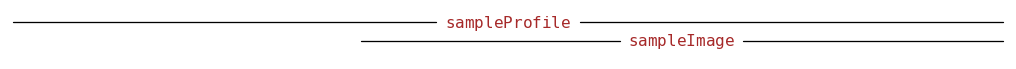

In [240]:
fig = plt.figure(figsize=(15, 0.8))

# setup the subplots
gs = gridspec.GridSpec(1, 1) #, width_ratios=[1.4, 1., 1.])
gs.update(left=0.07, right=0.99, top=0.98, bottom=0.16, wspace=0.25)

ax = plt.subplot(gs[0])


ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xticklabels('')
ax.set_xticks([])
ax.set_yticklabels('')
ax.set_yticks([])

bracket(ax, r"$\mathtt{sampleProfile}$", 0., 1., 0.75, 16, '#A62929', 1.3, hw=0.07)
bracket(ax, r"$\mathtt{sampleImage}$", 0.35, 1, 0.35, 16, '#A62929', 1.3, hw=0.06)

plt.savefig("code_overview0.pdf")
